In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Домашня робота № 3 «Однокрокові методи розв’язання задачі Коші.»
## Варіант 1  
#### Завдання 1. Знайти розв’язок задачі Коші для звичайного диференційного рівняння першого порядку $y' = f(x,y)$ на відрізку $[a, b]$ з кроком $h=0.1$ за початкових умов $y(x_0) = y_0$:
Завдання 1-го варiанту:
|$y' = f(x,y)$               |$y(x_0) = y_0$ |$[a, b]$     |
|:-:                         |:-:            |:-:          |
|$y' = y + \cos(x/\sqrt{5})$ |$y(1.8) = 2.6$ |$[1.8, 2.8]$ |

1. чисельними методами (розробити програму на одній з мов
програмування):
    1. методом Ейлера (явним);
    2. методом Ейлера-Коші;
    3. вдосконаленим методом Ейлера;
    4. методом Рунге-Кутта 4-го порядку;
2. використовуючи точний розв’язок диференціального рівняння, отриманий
одним з математичних пакетів або онлайн-калькулятора;
3. в одній системі координат побудувати для кожного методу графіки
наближеного розв’язку та інтегральну криву знайденого точного
розв’язку в Excel або в розробленій програмі;
4. порівняти отримані наближені значення розв’язку задачі з точним
розв’язком чисельно та графічно (табл. 1 та рис.1).

### Розрахункові формули
#### Явний метод Ейлера:
$$
y_{i+1} = y_i + f(x_i, y_i)h,\ i = 0, 1, 2,...,n-1
$$
#### Метод Ейлера-Кошi:
$$
y_{i+1} = y_i + \frac{h}{2}[f(x_i, y_i) + f(x_{i+1}, y_{i+1})],\\ 
y_{i+1} = y_i + \frac{h}{2}[f(x_i, y_i) + f(x_{i+1}, y_i + hf(x_i, y_i))],\ i = 0, 1, 2,...,n-1
$$
#### Вдосконалений метод Ейлера:
$$
y_{i+1} = y_i + f(x_i + \frac{h}{2}, y_{i+1}) * h, \\
y_{i+1} = y_i + f(x_i + \frac{h}{2}, y_i + \frac{h}{2}f(x_i, y_i)) * h,\ i = 0, 1, 2,...,n-1
$$
#### Метод Рунге-Кутта 4-го порядку:
$$
y_{i+1} = y_i + \frac{h}{6}(k_0 + 2k_1 + 2k_2 + k_3),\ i = 0, 1, 2,...,n-1 \\
\begin{cases}
k_0 = f(x_i, y_i) \\
k_1 = f(x_i + \frac{h}{2}, y_i + \frac{hk_0}{2}) \\
k_2 = f(x_i + \frac{h}{2}, y_i + \frac{hk_1}{2}) \\
k_3 = f(x_i + h, y_i + hk_2)    
\end{cases}
$$

## Порівняння однокрокових методів

Argument value    Exact solution    Euler method      Euler-Cauchy method   Improved Euler method   Runge-Kutta method  
x_k               y                 yk | error        yk | error            yk | error              yk | error          
---------------------------------------------------------------------------------------------------------------------
1.80              2.6000            2.6000|0.0000     2.6000|0.0000         2.6000|0.0000           2.6000|0.0000              
1.90              2.9447            2.9293|0.0153     2.9441|0.0005         2.9441|0.0005           2.9447|0.0000              
2.00              3.3221            3.2883|0.0338     3.3209|0.0012         3.3209|0.0012           3.3220|0.0001              
2.10              3.7356            3.6797|0.0559     3.7335|0.0021         3.7336|0.0020           3.7354|0.0002              
2.20              4.1886            4.1067|0.0819     4.1857|0.0029         4.1858|0.0028           4.1885|0.0002              


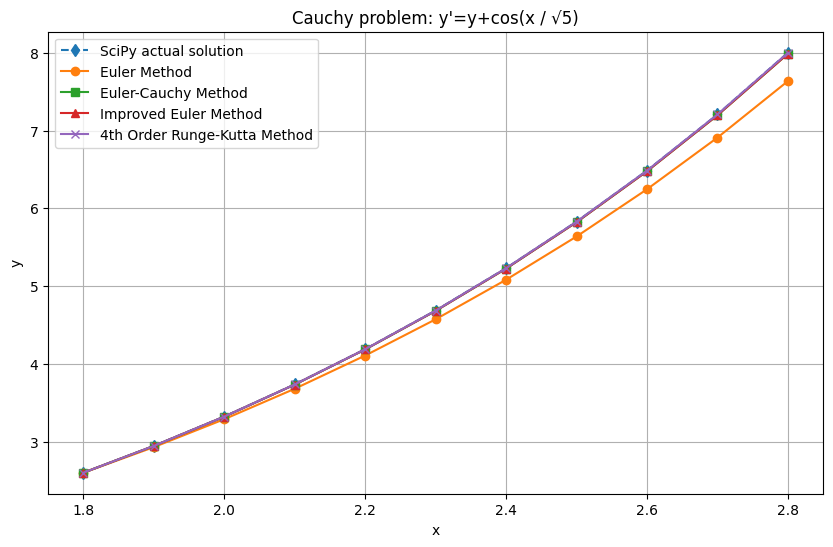

In [63]:
from scipy.integrate import solve_ivp

#* Initial conditions and parameters
x0 = 1.8
y0 = 2.6
h = 0.1
a = 1.8
b = 2.8

# Use solve_ivp to get the accurate solution
def scipy_solve_ivp(x0, y0, a, b, h):
    t_eval = np.arange(a, b + h, h)
    sol = solve_ivp(f, [a, b + h], [y0], t_eval=t_eval, method='RK45')
    return sol.t, sol.y[0]
# Actual solution
x_actual, y_actual = scipy_solve_ivp(x0, y0, a, b, h)

#* Differential equation
def f(x, y):
    return y + np.cos(x / np.sqrt(5))

# Define the methods
def euler_method(x0, y0, h, a, b):
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0, len(x) - 1):
        y[i+1] = y[i] + f(x[i], y[i]) * h
    return x, y

def euler_cauchy_method(x0, y0, h, a, b):
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0, len(x) - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i+1] = y[i] + h / 2 * (k1 + k2)
    return x, y

def improved_euler_method(x0, y0, h, a, b):
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0, len(x) - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        y[i+1] = y[i] + h * k2
    return x, y

def runge_kutta_4th_order(x0, y0, h, a, b):
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0, len(x) - 1):
        k0 = f(x[i], y[i])
        k1 = f(x[i] + h / 2, y[i] + h * k0 / 2)
        k2 = f(x[i] + h / 2, y[i] + h * k1 / 2)
        k3 = f(x[i] + h, y[i] + h * k2)
        y[i+1] = y[i] + h * (k0 + 2 * k1 + 2 * k2 + k3) / 6
    return x, y

#* Calculate the solutions using different methods
x_euler, y_euler = euler_method(x0, y0, h, a, b)
x_euler_cauchy, y_euler_cauchy = euler_cauchy_method(x0, y0, h, a, b)
x_improved_euler, y_improved_euler = improved_euler_method(x0, y0, h, a, b)
x_rk4, y_rk4 = runge_kutta_4th_order(x0, y0, h, a, b)   

#* Print out solution table
print(f"{f'Argument value':<18}{'Exact solution':<18}{'Euler method':<18}{'Euler-Cauchy method':<22}{'Improved Euler method':<24}{'Runge-Kutta method':<20}")
print(f"{f'x_k':<18}{'y':<18}{'yk | error':<18}{'yk | error':<22}{'yk | error':<24}{'yk | error':<20}")
print("-" * 117)
for i in range(len(x_euler)):
    print(f"{x_euler[i]:<18.2f}{y_actual[i]:<18.4f}{y_euler[i]:.4f}|{y_actual[i] - y_euler[i]:<11.4f}{y_euler_cauchy[i]:.4f}|{y_actual[i] - y_euler_cauchy[i]:<15.4f}{y_improved_euler[i]:.4f}|{y_actual[i] - y_improved_euler[i]:<17.4f}{y_rk4[i]:.4f}|{y_actual[i] - y_rk4[i]:<20.4f}")


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_actual, y_actual, label='SciPy actual solution', marker='d', linestyle='--')
plt.plot(x_euler, y_euler, label='Euler Method', marker='o')
plt.plot(x_euler_cauchy, y_euler_cauchy, label='Euler-Cauchy Method', marker='s')
plt.plot(x_improved_euler, y_improved_euler, label='Improved Euler Method', marker='^')
plt.plot(x_rk4, y_rk4, label='4th Order Runge-Kutta Method', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Cauchy problem: y'=y+cos(x / √5)")
plt.legend()
plt.grid(True)
plt.show()
